<a id='home'></a>
### purpose 

check on currently submitted jobs for AF runs and resubmit any jobs that failed

### outline

1. [get data directories](#get)

1. [get the seffs for job usage](#seffs)

    get the job usage reports from the slurm seff command

1. [plot memory requirements](#mem)

1. [look at status of submitted fitting jobs](#stat)

1. [look at status and resource use of submitted fitting jobs](#fit)

In [1]:
from pythonimports import *

import runtime_API as rt

lview, dview = get_client(cluster_id='1708524707-hnty', profile='lotterhos')

rt.latest_commit()
session_info.show()

36 36
#########################################################
Today:	February 21, 2024 - 09:25:07 EST
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 977f4ecb4bf51986ad24179b2609d4c63c5590a0  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Feb 16 12:13:22 2024 -0500

Current commit of MVP_offsets:
commit 8b790072e7a46d7f58a30c40cf4660986a612764  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Feb 2 13:55:49 2024 -0500

Current commit of MVP_runtime:
commit b24085be3441e41299da35731bc65e1b3eb25d81  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Tue Feb 20 09:43:50 2024 -0500
#########################################################



<a id='get'></a>
# get data directories

[top](#home)

In [2]:
pooled_dirs = rt.dirs['pooled']

pooled_dirs

{'run_20220919_0-225': ['/work/lotterhos/brandon/pooled_runtimes/run_20220919_0-225/00500',
  '/work/lotterhos/brandon/pooled_runtimes/run_20220919_0-225/05000',
  '/work/lotterhos/brandon/pooled_runtimes/run_20220919_0-225/10000',
  '/work/lotterhos/brandon/pooled_runtimes/run_20220919_0-225/20000'],
 'run_20220919_225-450': ['/work/lotterhos/brandon/pooled_runtimes/run_20220919_225-450/00500',
  '/work/lotterhos/brandon/pooled_runtimes/run_20220919_225-450/05000',
  '/work/lotterhos/brandon/pooled_runtimes/run_20220919_225-450/10000',
  '/work/lotterhos/brandon/pooled_runtimes/run_20220919_225-450/20000'],
 'run_20220919_450-675': ['/work/lotterhos/brandon/pooled_runtimes/run_20220919_450-675/00500',
  '/work/lotterhos/brandon/pooled_runtimes/run_20220919_450-675/05000',
  '/work/lotterhos/brandon/pooled_runtimes/run_20220919_450-675/10000',
  '/work/lotterhos/brandon/pooled_runtimes/run_20220919_450-675/20000']}

<a id='seffs'></a>
# get the seffs for job usage

get the job usage reports from the slurm seff command

[top](#home)

In [3]:
# training seffs
seffs = defaultdict(dict)
for rep, repdirs in pooled_dirs.items():
    for repdir in repdirs:
        num_loci = repdir.split('/')[6]
        
#         if num_loci != '20000':
#             continue
        
        shdir = f'{repdir}/gradient_forests/training/training_shfiles'

        outs = fs(shdir, endswith='.out')
        
        if len(outs) > 0:
            seffs[rep][num_loci] = Seffs.parallel(lview, outs=outs).most_recent()

            print(
                rep, num_loci, len(seffs[rep][num_loci]), '\n',
                seffs[rep][num_loci].states.counter(), '\n\n'
            )
        else:
            print(ColorText(f'{rep} {num_loci} 0').fail().bold())



Watching 450 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 450/450 [00:03<00:00, 125.96it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=450 luni=225
  warnings.warn(text)


run_20220919_0-225 00500 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 139.66it/s]


run_20220919_0-225 05000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 130.11it/s]


run_20220919_0-225 10000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 140.57it/s]


run_20220919_0-225 20000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 451 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 451/451 [00:03<00:00, 119.91it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=451 luni=225
  warnings.warn(text)


run_20220919_225-450 00500 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 145.24it/s]


run_20220919_225-450 05000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 226 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 226/226 [00:01<00:00, 140.05it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=226 luni=225
  warnings.warn(text)


run_20220919_225-450 10000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 139.56it/s]


run_20220919_225-450 20000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 347 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 347/347 [00:02<00:00, 131.50it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=347 luni=225
  warnings.warn(text)


run_20220919_450-675 00500 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 226 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 226/226 [00:01<00:00, 129.25it/s]


run_20220919_450-675 05000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 138.92it/s]


run_20220919_450-675 10000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 227 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 227/227 [00:01<00:00, 125.42it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=227 luni=225
  warnings.warn(text)


run_20220919_450-675 20000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 




<a id='mem'></a>
### plot memory requirements

[top](#home)

run_20220919_0-225 00500
	 225 225


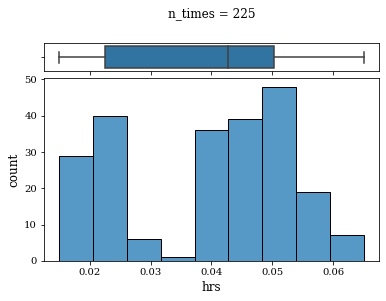

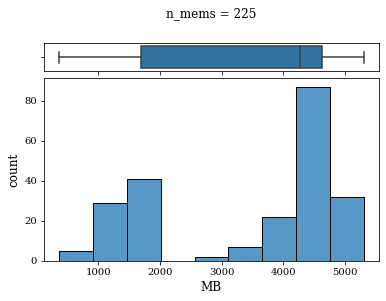

run_20220919_0-225 05000
	 225 225


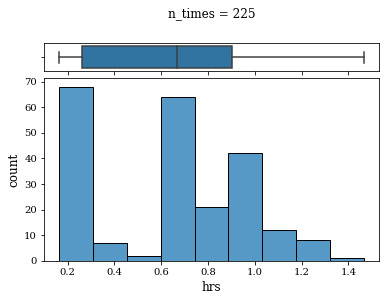

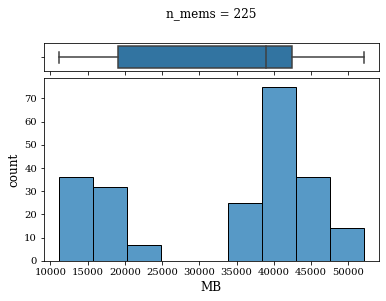

run_20220919_0-225 10000
	 225 225


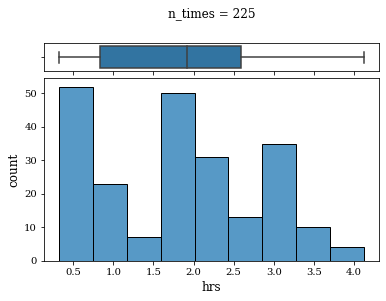

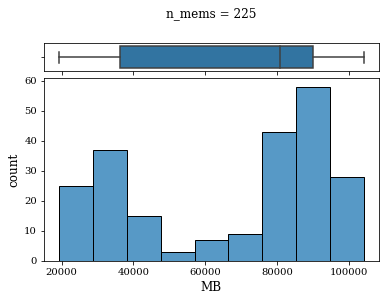

run_20220919_0-225 20000
	 225 168


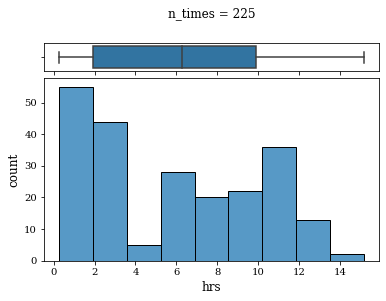

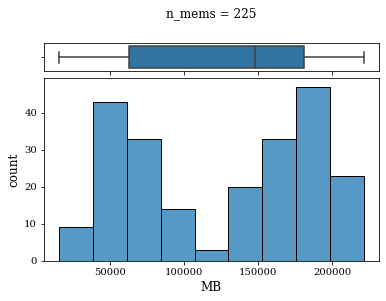

run_20220919_225-450 00500
	 225 225


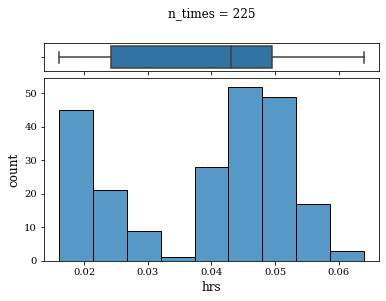

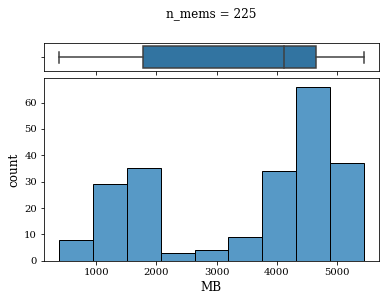

run_20220919_225-450 05000
	 225 225


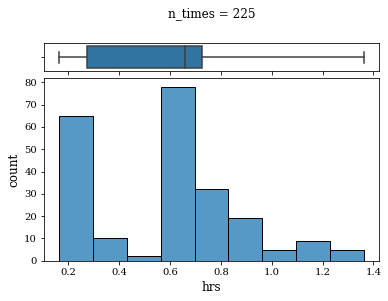

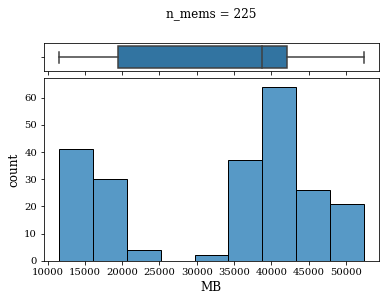

run_20220919_225-450 10000
	 225 225


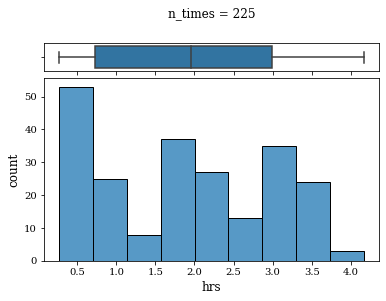

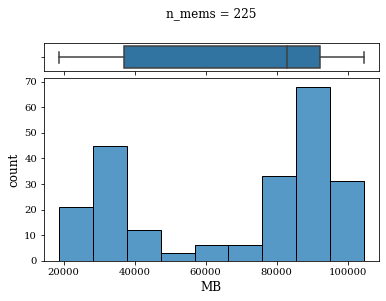

run_20220919_225-450 20000
	 225 158


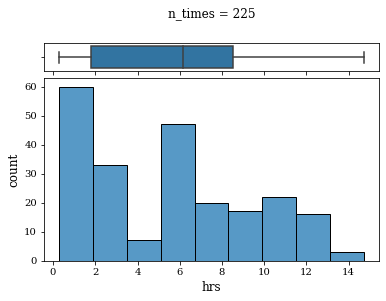

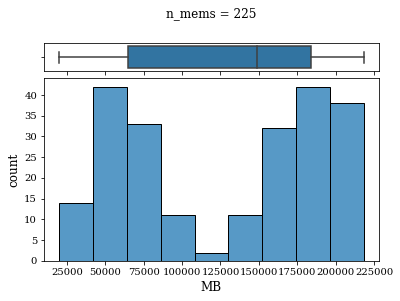

run_20220919_450-675 00500
	 225 225


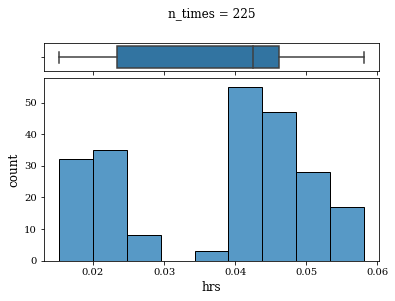

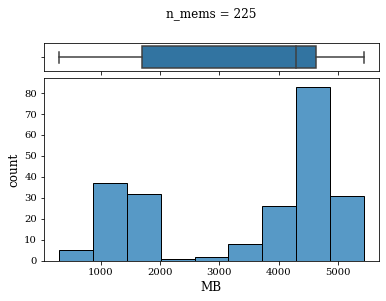

run_20220919_450-675 05000
	 225 225


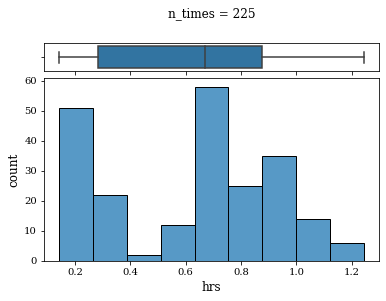

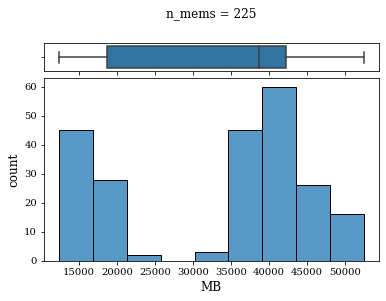

run_20220919_450-675 10000
	 225 225


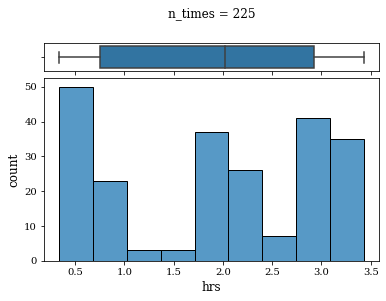

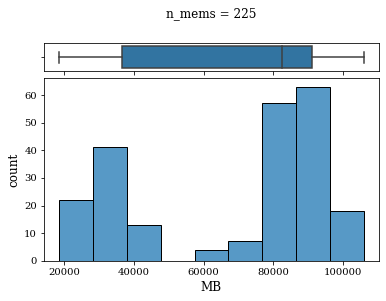

run_20220919_450-675 20000
	 225 162


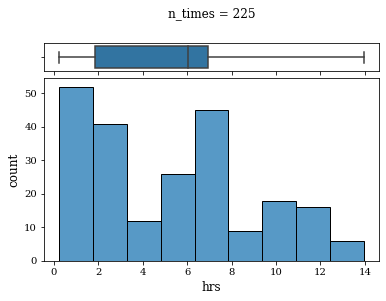

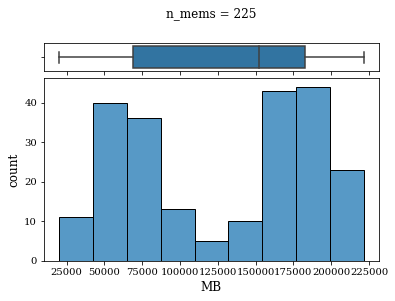

In [4]:
for (rep, num_loci), repseffs in unwrap_dictionary(seffs):
    print(rep, num_loci)
    print('\t', len(repseffs.mems), sum(repseffs.mems < 180000))
    repseffs.plot_times()
    repseffs.plot_mems()

<a id='stat'></a>
### look at status of submitted fitting jobs

[top](#home)

In [5]:
seeds = wrap_defaultdict(list, 2)
shseeds = wrap_defaultdict(dict, 2)
for rep, dirs in pooled_dirs.items():
    for d in dirs:
        num_loci = d.split("/")[6]
        
        fitting_dir = f'{d}/gradient_forests/fitting/fitting_shfiles'

        if op.exists(fitting_dir):
            shfiles = fs(fitting_dir, endswith='.sh', exclude='watcher')
            assert len(shfiles) == 225

            for sh in shfiles:
                seed = op.basename(sh).split("_")[0]
                seeds[rep][num_loci].append(seed)
                shseeds[rep][num_loci][seed] = sh
        else:
            print(rep, repnum)

luni(seeds)

3

In [6]:
fitting_needed = defaultdict(dict)
training_needed = defaultdict(dict)
for rep, repdirs in pooled_dirs.items():
    for repdir in repdirs:
        gf_dir = f'{repdir}/gradient_forests'
        num_loci = repdir.split("/")[6]
        
        training_dir = f'{repdir}/gradient_forests/training/training_shfiles'
        
        
        if len(fs(training_dir, endswith='.out')) > 0:
            # get needed fitting jobs
            validation_dir = f'{gf_dir}/validation/corrs'
            needed = set(seeds[rep][num_loci])
            
            if op.exists(validation_dir):
                pkls = fs(validation_dir, endswith='.pkl')
                
#                 if len(pkls) > 0:
#                     print(rep, num_loci, len(pkls))

                for pkl in pkls:
                    needed -= set([op.basename(pkl).split("_")[0]])
        
            fitting_needed[rep][num_loci] = needed
            
            # get needed training jobs
            outfile_dir = f'{gf_dir}/training/training_outfiles'
            outfiles = fs(outfile_dir, endswith='training.RDS')
            
            needed = set(seeds[rep][num_loci])
            
            for outfile in outfiles:
                seed = op.basename(outfile).split("_")[0]
                needed -= set([seed])
            
            training_needed[rep][num_loci] = needed

In [7]:
# print needed training and fitting jobs
for (rep, rep_num), needs in unwrap_dictionary(fitting_needed):
    print(rep, rep_num, len(training_needed[rep][rep_num]), len(needs), '\n')

run_20220919_0-225 00500 0 0 

run_20220919_0-225 05000 0 0 

run_20220919_0-225 10000 0 0 

run_20220919_0-225 20000 0 0 

run_20220919_225-450 00500 0 0 

run_20220919_225-450 05000 0 0 

run_20220919_225-450 10000 0 0 

run_20220919_225-450 20000 0 0 

run_20220919_450-675 00500 0 0 

run_20220919_450-675 05000 0 0 

run_20220919_450-675 10000 0 0 

run_20220919_450-675 20000 0 0 



In [9]:
fitting_needed

defaultdict(dict,
            {'run_20220919_0-225': {'00500': set(),
              '05000': set(),
              '10000': set(),
              '20000': set()},
             'run_20220919_225-450': {'00500': set(),
              '05000': set(),
              '10000': set(),
              '20000': set()},
             'run_20220919_450-675': {'00500': set(),
              '05000': set(),
              '10000': set(),
              '20000': set()}})

<a id='fit'></a>
### fitting seffs

get resource use info for fitting jobs

we expect to see jobs end in failure because they are only running under the 'all' and trip errors when keys are expected for 'adaptive' or 'neutral' markers.

However, performance data is saved before errors occur

[top](#home)

In [13]:
# fitting fitseffs - I'm expecting jobs to fail because of dictionary errors (but after performance is saved)

fitseffs = defaultdict(dict)
for rep, repdirs in pooled_dirs.items():
    for repdir in repdirs:
        num_loci = repdir.split('/')[6]
        
        shdir = f'{repdir}/gradient_forests/fitting/fitting_shfiles'

        outs = fs(shdir, endswith='.out')
        
        if len(outs) > 0:
            fitseffs[rep][num_loci] = Seffs.parallel(lview, outs=outs).most_recent()

            print(rep, num_loci, fitseffs[rep][num_loci].states.counter())
        else:
            print(ColorText(f'\n!!!! {rep} {num_loci} 0 !!!!\n').fail().bold())


Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 137.46it/s]


run_20220919_0-225 00500 Counter({'State: FAILED (exit code 1)': 225})

Watching 228 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 228/228 [00:01<00:00, 126.18it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=228 luni=225
  warnings.warn(text)


run_20220919_0-225 05000 Counter({'State: FAILED (exit code 1)': 225})

Watching 226 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 226/226 [00:01<00:00, 138.35it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=226 luni=225
  warnings.warn(text)


run_20220919_0-225 10000 Counter({'State: FAILED (exit code 1)': 225})

Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 128.65it/s]


run_20220919_0-225 20000 Counter({'State: FAILED (exit code 1)': 225})

Watching 226 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 226/226 [00:01<00:00, 138.09it/s]


run_20220919_225-450 00500 Counter({'State: FAILED (exit code 1)': 225})

Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 128.92it/s]


run_20220919_225-450 05000 Counter({'State: FAILED (exit code 1)': 225})

Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 138.93it/s]


run_20220919_225-450 10000 Counter({'State: FAILED (exit code 1)': 225})

Watching 226 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 226/226 [00:01<00:00, 131.39it/s]


run_20220919_225-450 20000 Counter({'State: FAILED (exit code 1)': 225})

Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 139.57it/s]


run_20220919_450-675 00500 Counter({'State: FAILED (exit code 1)': 225})

Watching 226 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 226/226 [00:01<00:00, 138.54it/s]


run_20220919_450-675 05000 Counter({'State: FAILED (exit code 1)': 225})

Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 138.58it/s]


run_20220919_450-675 10000 Counter({'State: FAILED (exit code 1)': 225})

Watching 226 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 226/226 [00:01<00:00, 131.09it/s]

run_20220919_450-675 20000 Counter({'State: FAILED (exit code 1)': 225})


run_20220919_0-225 00500


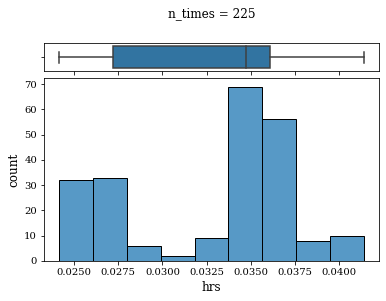

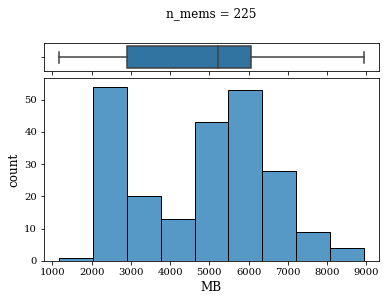

run_20220919_0-225 05000


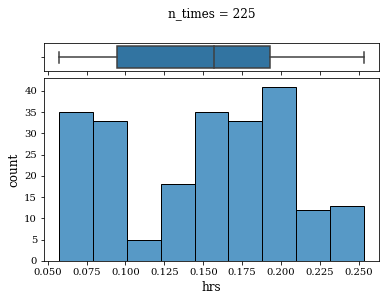

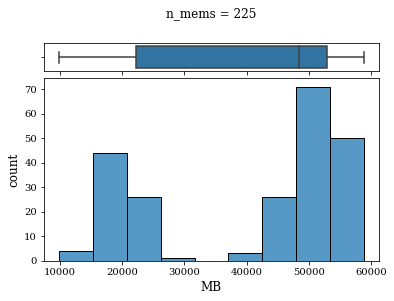

run_20220919_0-225 10000


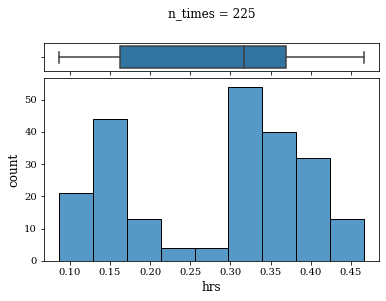

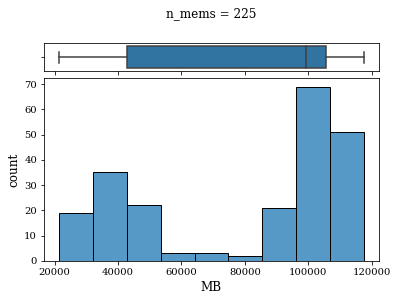

run_20220919_0-225 20000


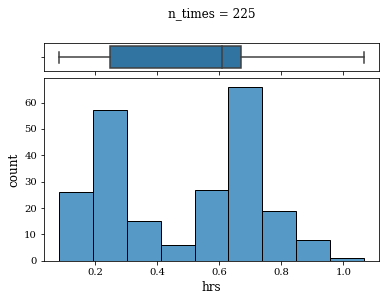

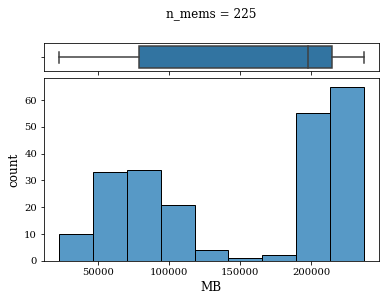

run_20220919_225-450 00500


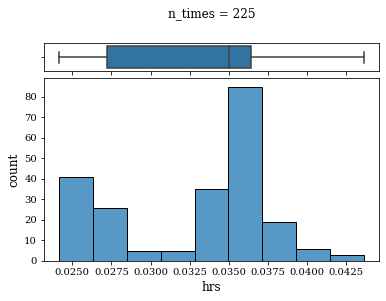

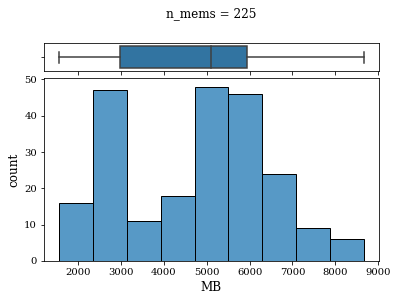

run_20220919_225-450 05000


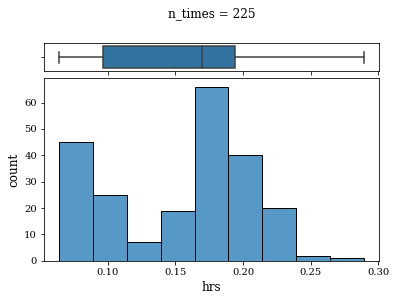

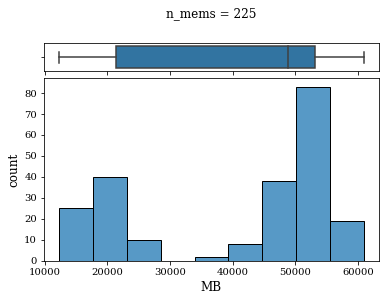

run_20220919_225-450 10000


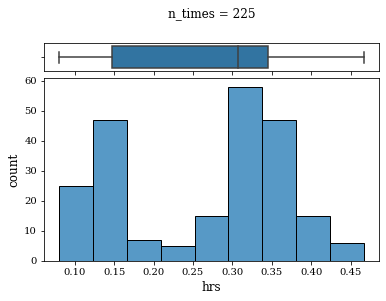

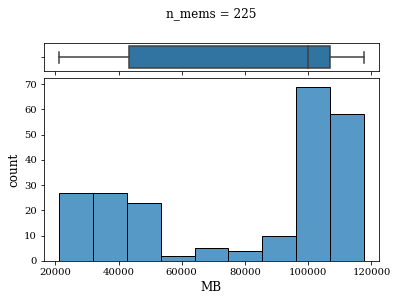

run_20220919_225-450 20000


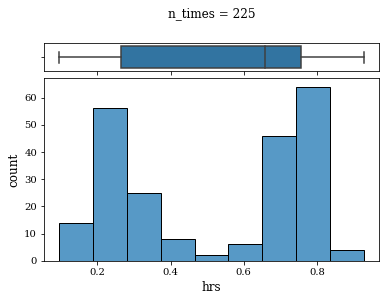

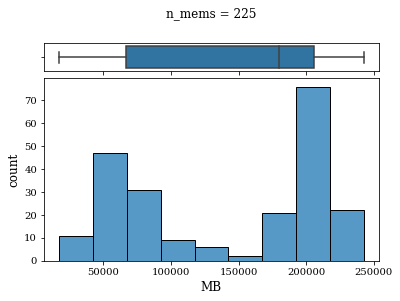

run_20220919_450-675 00500


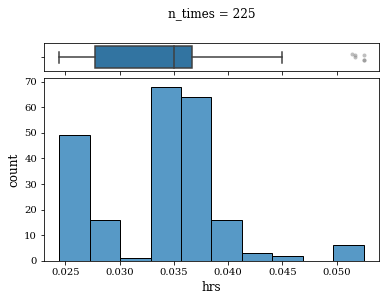

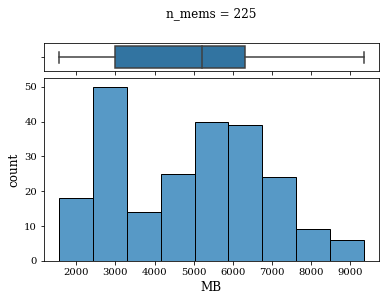

run_20220919_450-675 05000


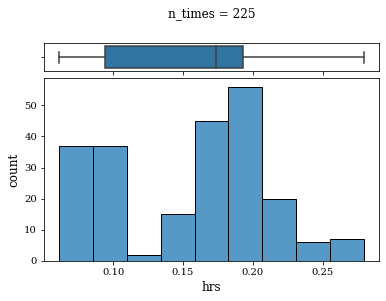

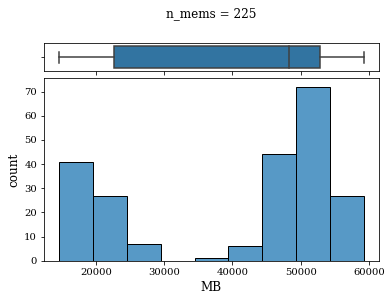

run_20220919_450-675 10000


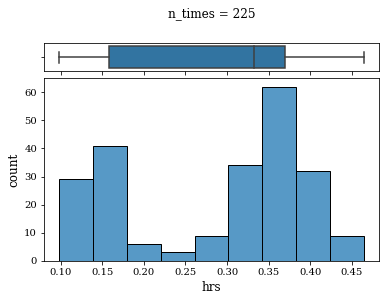

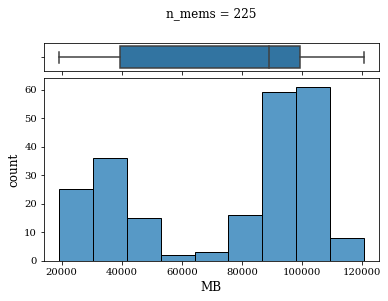

run_20220919_450-675 20000


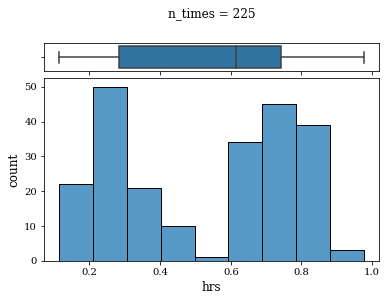

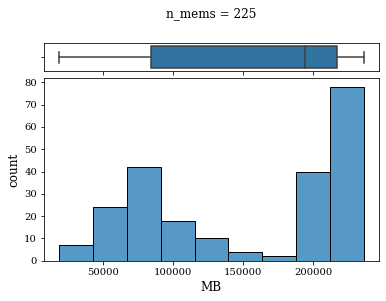

In [14]:
for (rep, repnum), repseffs in unwrap_dictionary(fitseffs):
    print(rep, repnum)
    repseffs.plot_times()
    repseffs.plot_mems()